# COVIT-19 Data Analisys

## Get Public DataSets for COVIT-19
Extract last data published

In [2]:
import urllib
import datetime
dt = datetime.datetime.today()
year = dt.strftime('%Y')
month = dt.strftime('%m')
day = dt.strftime('%d')
# Mundial Data
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}.xls'
url_of_file = f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{year}-{month}-{day}.xlsx'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)

# Mapped Data
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Confirmed.csv'
url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Death.csv'
url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)
outfilename = f'COVIT-19-{dt.year}{dt.month}{dt.day}-Recovered.csv'
url_of_file = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
print(url_of_file)
urllib.request.urlretrieve(url_of_file, outfilename)

https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-25.xlsx
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv


('COVIT-19-2020325-Recovered.csv', <http.client.HTTPMessage at 0x7fb10411de48>)

## Prepare and Clean Data
Build DataSet to work

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt

# Read Data
dt = datetime.datetime.today()
file = f'COVIT-19-{dt.year}{dt.month}{dt.day}.xls'
df = pd.read_excel(file)

# Prepare Dataset
data = pd.DataFrame(df, columns= ['DateRep', 'Day','Month', 'Year', 'Cases', 'Deaths', 'Countries and territories'])
data = data.rename(columns={"DateRep": "Date", "Countries and territories": "Country"})

# Filter Dataset
data = data[data['Cases'] > 0]
data['Period'] = data['Month']*100+data['Day']
data = data.sort_values(['Country', 'Date'], ascending=[True, True])

# Index DataSet
data['Id'] = data.groupby(['Country']).cumcount()

# Prepare data
ant = data.iloc[0]['Cases']
antd = data.iloc[0]['Deaths']
ants = 0
country = data.iloc[0]['Country']
i = 0
c = []
d = []
s = []

death = False
for i in range(i, len(data)):

  # Validate start first death
  if country == data.iloc[i]['Country']:
    if death == False and data.iloc[i]['Deaths'] > 0:
      death = True
  else: 
    death = False

  # Sumarize
  Cases = (data.iloc[i]['Cases'] + (ant if i > 0 else 0)) if country == data.iloc[i]['Country'] else data.iloc[i]['Cases']
  Deaths = (data.iloc[i]['Deaths'] + (antd if i > 0 else 0)) if country == data.iloc[i]['Country'] else data.iloc[i]['Deaths']
  StartDeaths = 1 if country == data.iloc[i]['Country'] and death else 0
  
  # Append cases
  c.append(Cases)
  d.append(Deaths)
  s.append(StartDeaths)
  ant = Cases
  antd = Deaths
  ants = startDeaths
  country = data.iloc[i]['Country']

data["Total_Cases"] = c
data["Total_Deaths"] = d
data['StartDeaths'] = s


# Index DataSet start by deaths
data = data[data['StartDeaths'] == 1]
data['Id'] = data.groupby(['Country']).cumcount()

data.head(50)

,Date,Day,Month,Year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths,StartDeaths
1,2020-03-24,24,3,2020,6,1,Afghanistan,324,0,40,1,1
0,2020-03-25,25,3,2020,2,0,Afghanistan,325,1,42,1,1
93,2020-03-12,12,3,2020,1,1,Albania,312,0,11,1,1
92,2020-03-13,13,3,2020,12,0,Albania,313,1,23,1,1
91,2020-03-14,14,3,2020,10,0,Albania,314,2,33,1,1
90,2020-03-15,15,3,2020,5,0,Albania,315,3,38,1,1
89,2020-03-16,16,3,2020,4,0,Albania,316,4,42,1,1
88,2020-03-17,17,3,2020,9,0,Albania,317,5,51,1,1
87,2020-03-18,18,3,2020,4,0,Albania,318,6,55,1,1
86,2020-03-19,19,3,2020,4,1,Albania,319,7,59,2,1


# Compare Virus Propagation Mexico vs Spain, Italy and EU By days
Compare COVIT-19 propagation in Mexico with Spain, Italy and EU

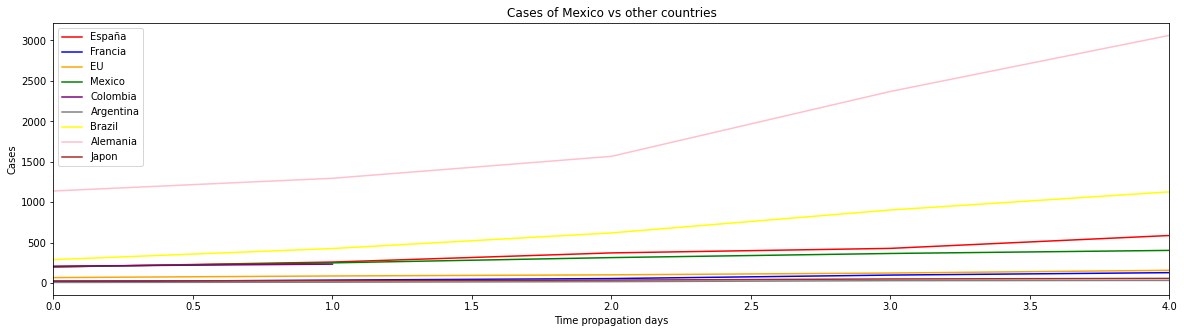

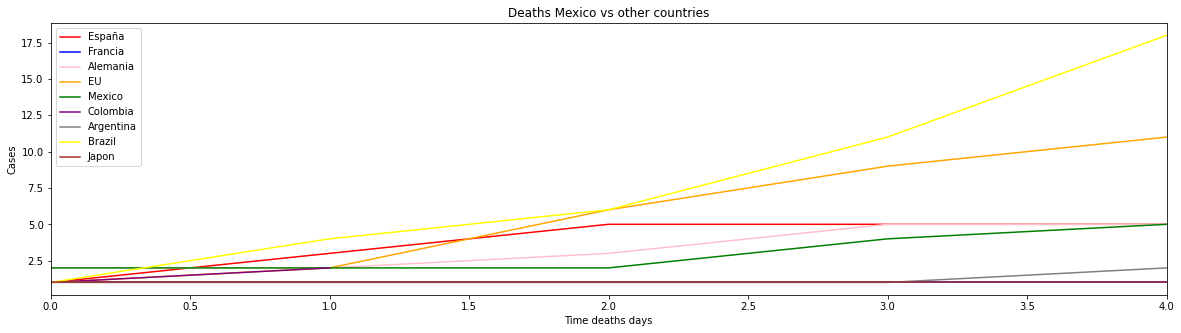

,Date,Day,Month,Year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths,StartDeaths
4025,2020-03-21,21,3,2020,39,2,Mexico,321,0,203,2,1
4024,2020-03-22,22,3,2020,48,0,Mexico,322,1,251,2,1
4023,2020-03-23,23,3,2020,65,0,Mexico,323,2,316,2,1
4022,2020-03-24,24,3,2020,51,2,Mexico,324,3,367,4,1
4021,2020-03-25,25,3,2020,38,1,Mexico,325,4,405,5,1


In [18]:
# Filter by country
mexico = data[(data['Country'] == 'Mexico')]
spain = data[(data['Country'] == 'Spain')]
spain = spain[spain['Id'] < len(mexico) ]
eu = data[(data['Country'] == 'United_States_of_America')]
eu = eu[eu['Id'] < len(mexico) ]
italy = data[(data['Country'] == 'Italy')]
italy = italy[italy['Id'] < len(mexico) ]
colombia = data[(data['Country'] == 'Colombia')]
colombia = colombia[colombia['Id'] < len(mexico) ]
argentina = data[(data['Country'] == 'Argentina')]
argentina = argentina[argentina['Id'] < len(mexico) ]
brazil = data[(data['Country'] == 'Brazil')]
brazil = brazil[brazil['Id'] < len(mexico) ]
germany = data[(data['Country'] == 'Germany')]
germany = germany[germany['Id'] < len(mexico)]
japan = data[(data['Country'] == 'Japan')]
japan = japan[japan['Id'] < len(mexico)]
france = data[(data['Country'] == 'France')]
france = france[france['Id'] < len(mexico)]

#result_compare = mexico.merge(spain, left_on=['Id'], right_on=['Id'], suffixes=('', '_es'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Country_es','Cases_es','Deaths_es','Total_Cases_es','Total_Deaths_es']]
#result_compare = result_compare.merge(eu, left_on=['Id'], right_on=['Id'], suffixes=('', '_eu'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Period_eu','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu']]
#result_compare = result_compare.merge(italy, left_on=['Id'], right_on=['Id'], suffixes=('', '_it'))
#result_compare = result_compare.loc[::,['Id','Period','Country','Cases','Deaths','Total_Cases','Total_Deaths','Period_es','Cases_es','Deaths_es','Total_Cases_es','Cases_eu','Deaths_eu','Total_Cases_eu','Total_Deaths_eu','Period_it','Cases_it','Deaths_it','Total_Cases_it','Total_Deaths_it']]

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, title='Cases of Mexico vs other countries', figsize=(20,5), label="España")
france.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, figsize=(20,5), label="Francia")
eu.plot(kind='line', x='Id',y='Total_Cases', color='orange', ax=ax, label="EU")
mexico.plot(kind='line',x='Id',y='Total_Cases', color='green', ax=ax, label="Mexico")
colombia.plot(kind='line',x='Id',y='Total_Cases', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Total_Cases', color='gray', ax=ax, label="Argentina")
brazil.plot(kind='line',x='Id',y='Total_Cases', color='yellow', ax=ax, label="Brazil")
germany.plot(kind='line',x='Id',y='Total_Cases', color='pink', ax=ax, label="Alemania")
japan.plot(kind='line',x='Id',y='Total_Cases', color='brown', ax=ax, label="Japon")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, title='Deaths Mexico vs other countries', figsize=(20,5), label="España")
france.plot(kind='line',x='Id',y='Total_Deaths', color='blue', ax=ax, label="Francia")
germany.plot(kind='line',x='Id',y='Total_Deaths', color='pink', ax=ax, label="Alemania")
eu.plot(kind='line', x='Id',y='Total_Deaths', color='orange', ax=ax, label="EU")
mexico.plot(kind='line',x='Id',y='Total_Deaths', color='green', ax=ax, label="Mexico")
colombia.plot(kind='line',x='Id',y='Total_Deaths', color='purple', ax=ax, label="Colombia")
argentina.plot(kind='line',x='Id',y='Total_Deaths', color='gray', ax=ax, label="Argentina")
brazil.plot(kind='line',x='Id',y='Total_Deaths', color='yellow', ax=ax, label="Brazil")
japan.plot(kind='line',x='Id',y='Total_Deaths', color='brown', ax=ax, label="Japon")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

mexico.head(50)

#result_compare.head(50)

# Future propagation days in other countries

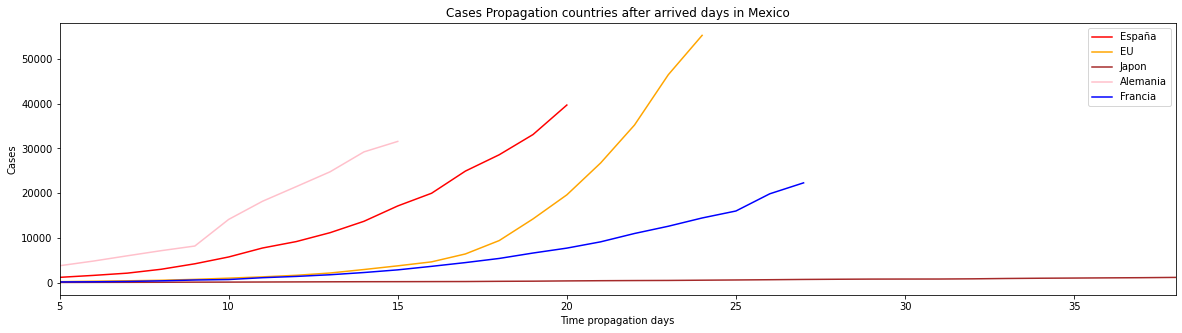

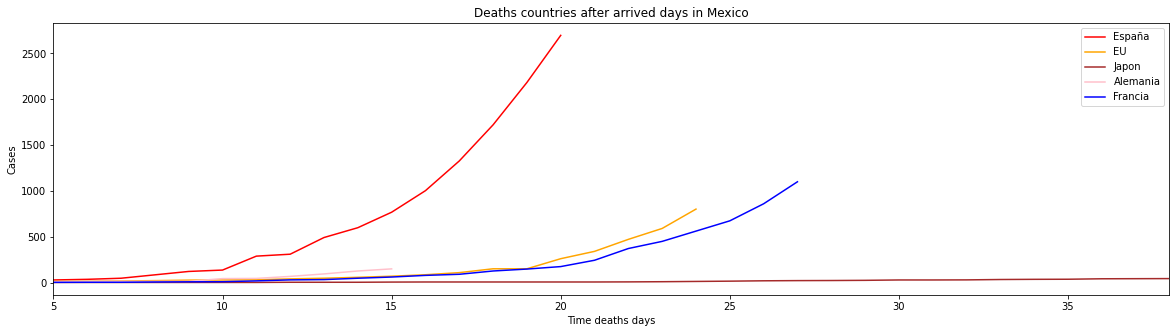

,Date,Day,Month,Year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths,StartDeaths
3406,2020-02-19,19,2,2020,7,0,Japan,219,5,66,1,1
3405,2020-02-20,20,2,2020,18,0,Japan,220,6,84,1,1
3404,2020-02-21,21,2,2020,9,0,Japan,221,7,93,1,1
3403,2020-02-22,22,2,2020,12,0,Japan,222,8,105,1,1
3402,2020-02-23,23,2,2020,27,0,Japan,223,9,132,1,1
3401,2020-02-24,24,2,2020,12,0,Japan,224,10,144,1,1
3399,2020-02-26,26,2,2020,20,0,Japan,226,11,164,1,1
3398,2020-02-27,27,2,2020,22,2,Japan,227,12,186,3,1
3397,2020-02-28,28,2,2020,24,0,Japan,228,13,210,3,1
3396,2020-02-29,29,2,2020,20,0,Japan,229,14,230,3,1


In [21]:
# Filter by country
spain = data[(data['Country'] == 'Spain')]
spain = spain[spain['Id'] >= len(mexico) ]
eu = data[(data['Country'] == 'United_States_of_America')]
eu = eu[eu['Id'] >= len(mexico) ]
italy = data[(data['Country'] == 'Italy')]
italy = italy[italy['Id'] >= len(mexico) ]
japan = data[(data['Country'] == 'Japan')]
japan = japan[japan['Id'] >= len(mexico)]
china = data[(data['Country'] == 'China')]
china = china[china['Id'] >= len(mexico)]
german = data[(data['Country'] == 'Germany')]
german = german[german['Id'] >= len(mexico)]
france = data[(data['Country'] == 'France')]
france = france[france['Id'] >= len(mexico)]

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, title='Cases Propagation countries after arrived days in Mexico', figsize=(20,5), label="España")
eu.plot(kind='line', x='Id',y='Total_Cases', color='orange', ax=ax, label="EU")
japan.plot(kind='line',x='Id',y='Total_Cases', color='brown', ax=ax, label="Japon")
german.plot(kind='line',x='Id',y='Total_Cases', color='pink', ax=ax, label="Alemania")
france.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, label="Francia")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

spain.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, title='Deaths countries after arrived days in Mexico', figsize=(20,5), label="España")
eu.plot(kind='line', x='Id',y='Total_Deaths', color='orange', ax=ax, label="EU")
japan.plot(kind='line',x='Id',y='Total_Deaths', color='brown', ax=ax, label="Japon")
german.plot(kind='line',x='Id',y='Total_Deaths', color='pink', ax=ax, label="Alemania")
france.plot(kind='line',x='Id',y='Total_Deaths', color='blue', ax=ax, label="Francia")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

japan.head(50)

# Worse of Cases

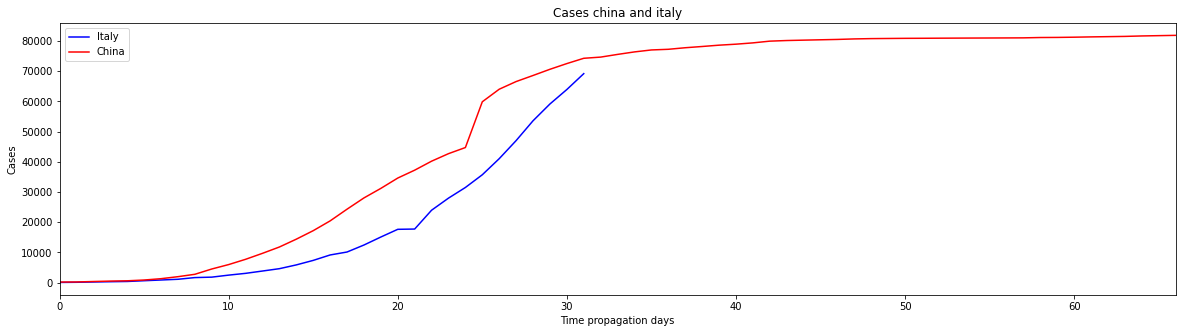

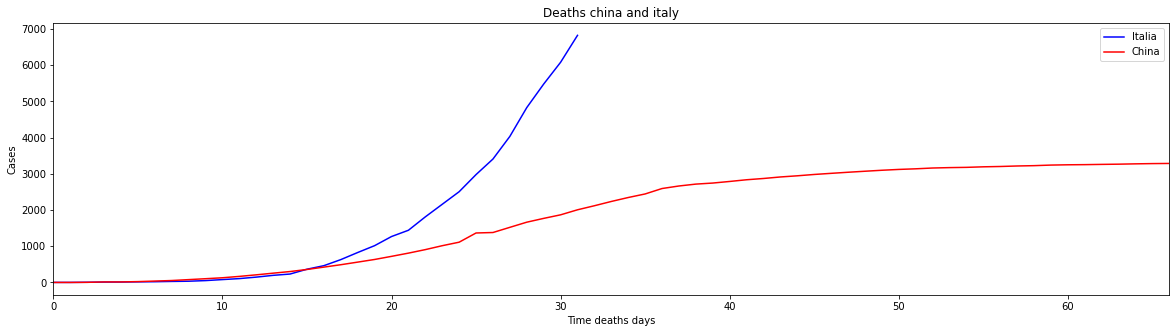

,Date,Day,Month,Year,Cases,Deaths,Country,Period,Id,Total_Cases,Total_Deaths,StartDeaths
3303,2020-02-23,23,2,2020,62,2,Italy,223,0,79,2,1
3302,2020-02-24,24,2,2020,53,0,Italy,224,1,132,2,1
3301,2020-02-25,25,2,2020,97,4,Italy,225,2,229,6,1
3300,2020-02-26,26,2,2020,93,5,Italy,226,3,322,11,1
3299,2020-02-27,27,2,2020,78,1,Italy,227,4,400,12,1
3298,2020-02-28,28,2,2020,250,5,Italy,228,5,650,17,1
3297,2020-02-29,29,2,2020,238,4,Italy,229,6,888,21,1
3296,2020-03-01,1,3,2020,240,8,Italy,301,7,1128,29,1
3295,2020-03-02,2,3,2020,561,6,Italy,302,8,1689,35,1
3294,2020-03-03,3,3,2020,146,17,Italy,303,9,1835,52,1


In [22]:
# Filter by country
italy = data[(data['Country'] == 'Italy')]
china = data[(data['Country'] == 'China')]

ax = plt.gca()

italy.plot(kind='line',x='Id',y='Total_Cases', color='blue', ax=ax, title='Cases china and italy', figsize=(20,5), label="Italy")
china.plot(kind='line',x='Id',y='Total_Cases', color='red', ax=ax, label="China")

ax.set_xlabel("Time propagation days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

ax = plt.gca()

italy.plot(kind='line',x='Id',y='Total_Deaths', color='blue', ax=ax, title='Deaths china and italy', figsize=(20,5), label="Italia")
china.plot(kind='line',x='Id',y='Total_Deaths', color='red', ax=ax, label="China")

ax.set_xlabel("Time deaths days")
ax.set_ylabel("Cases")
ax.can_zoom()
plt.show()

italy.head(50)

## Evolution of the Virus
Next days virus propagation

In [0]:
# Building

# Test for build interactive Dashboard

In [0]:
from IPython.display import display
from IPython.html.widgets import *
from ipywidgets import widgets

text = widgets.Text()
display(text)

def handle_submit(sender):
  print(text.value)

text.on_submit(handle_submit)

def f(x):
  print(x)

interact(f,x=10)